<a href="https://colab.research.google.com/github/Ayushkrn7781/Ayushkrn/blob/main/ML_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
## Developing an Artificial Neural Network from Scratch.

In this notebook, we will be developing a feedforward neural network.

We will import the MNIST dataset from keras datsets. The MNIST dataset contains images of 28x28 pixels each having values ranging from 0-255.
It has 60000 images in the training set and 10000 images in the test set. However, we will only use the first 10000 images for training and first 1000 images for testing because our code isn't optimized and it takes time to run. We are not looking for accuracy of our network right now, we will be doing that in the next week when we will be implementing the same using Tensorflow.


Run the first 3 cells. Your code begins after that.

In [ ]:
import numpy as np
from keras.datasets import mnist
import random

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


As discussed in the class, the images are flattened to a column.

Then we are normalizing them by dividing by 255.

In [ ]:
train_X=train_X.reshape(60000,784,1)    # flattening
test_X=test_X.reshape(10000,784,1)

train_y=train_y.reshape(60000,1)
test_y=test_y.reshape(10000,1)

train_X= train_X/255
test_X = test_X/255

train_X=train_X[:10000]         #taking the first 10000 images.
train_y=train_y[:10000]
test_X=test_X[:1000]
test_y=test_y[:1000]
train_data=list(zip(train_X,train_y))
test_data=list(zip(test_X,test_y))

## 1.1 Write the code for Sigmoid Function.

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

## 1.2 The Network

We will making a class called Network which has certain functions inside it. The cost function used is Cross-Entropy Loss. You need to code only the first 3. Rest are done for you.  There are various places within the code marked as stop_zone. Read the instructions below the code at those places to check whether your code till there is correct or not.

In [ ]:
class Network(object):
    def __init__(self,sizes): # sizes is a list containing the network.
                              # eg : [784,128,10] means input =784 neurons,
                              #    1st hidden layer 128 neurons, output 10 neurons.
        self.sizes=sizes
        self.num_layers=len(sizes)
        self.weights= [np.random.randn(x,y) for x,y in zip(sizes[1:],sizes[:-1])]
        self.biases= [np.random.randn(x,1) for x in sizes[1:]]

# stop_zone 1. Comment out all the code below. Select all rows below. Click Ctrl + /.
# Include the show function given below above this comment area inside the class.
# Run this cell and then run the code with stop_zone 1 written below.
# After this testing, don't forget tto remove the comments. Same, select all, Ctrl+/.


    def show(self):
      print(self.num_layers)
      for bias in self.biases:
          print(bias.shape)
      for weight in self.weights:
          print(weight.shape)

    def forwardpropagation(self,a):
        for b,w in zip(self.biases, self.weights):
            a=sigmoid(np.dot(w,a)+b)
            #print(a.shape)
        return a

# stop_zone 2. Comment out all the code below. Don't comment out the __init__ method else you will get error.
# Remove comment from print(a.shape) line above. Run this cell. And run the code with stop_zone 2 written below.


    def backpropagation(self,x,y):

        # nothing to do in this 3 lines.
        y_t = np.zeros((len(y), 10))
        y_t[np.arange(len(y)), y] = 1
        y_t= y_t.T

        #nabla_b=dC/db and nabla_w=dC/dw. They are lists of shapes equal to that of bias and weights.
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]

        # initially, a0 = input.
        activation=x
        activation_list=[x]

        # step 1 : calculation of delta in last layer

        # write the same forward propagation code here but while doing so store the a's.
        for w,b in zip(self.weights,self.biases):
            activation= sigmoid(np.dot(w,activation_list[-1])+b)
            activation_list.append(activation)

        delta= (activation_list[-1]-y)*activation_list[-1]*(1-activation_list[-1])
        # step 2 : nabla_b and nabla_w relation with delta of last layer

        nabla_b[-1]=delta
        nabla_w[-1]=np.dot(delta,activation_list[-2].T)
        # print("{} {}".format(nabla_b[-1].shape,nabla_w[-1].shape) )
#stop_zone 3 : remove comment from the print statement just above and run the cell for stop_zone3.
# don't forget commenting out.

        # step 3 : calculation of delta for hidden layers

        for j in range(2,self.num_layers):
            sig_der = activation_list[-j]*(1-activation_list[-j])
            delta= (activation_list[-j]-y)*activation_list[-j]*(1-activation_list[-j])

            # step 4 : nabla_b and nabla_w relation with delta of others layers
            nabla_b[-j]= delta
            nabla_w[-j]= np.dot(delta,activation_list[-j-1].T)

#stop_zone 4 : Run the cell for stop_zone 4.
        return (nabla_b,nabla_w)

    # the functions below are complete. If you are fine till stop_zone 4, you can run
    # this whole cell and train, test the data by running the last cell of the question.
    # You may need to wait for around 10 minutes to see the test predictions.
    def update_mini_batch(self,mini_batch,lr):
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]
        for x,y in mini_batch:
            delta_b,delta_w= self.backpropagation(x,y)
            nabla_b=[nb+ db for nb,db in zip (nabla_b,delta_b)]
            nabla_w=[nw+dw for nw,dw in zip(nabla_w,delta_w)]

        self.weights=[w- lr*nw/len(mini_batch) for w,nw in zip(self.weights,nabla_w)]
        self.biases=[b-lr*nb/len(mini_batch) for b,nb in zip(self.biases,nabla_b)]


    def SGD(self, train_data,epochs,mini_batch_size, lr):
        n_train= len(train_data)
        for i in range(epochs):
            random.shuffle(train_data)
            mini_batches = [train_data[k:k+ mini_batch_size] for k in range(0,n_train,mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch,lr)

            self.predict(train_data)
            print("Epoch {0} completed.".format(i+1))

    def predict(self,test_data):
        test_results = [(np.argmax(self.forwardpropagation(x)),y) for x,y in test_data]
        # returns the index of that output neuron which has highest activation

        num= sum(int (x==y) for x,y in test_results)
        print ("{0}/{1} classified correctly.".format(num,len(test_data)))



In [ ]:
# stop_zone 1

# def show(self):
#   print(self.num_layers)
#   for bias in self.biases:
#       print(bias.shape)
#   for weight in self.weights:
#       print(weight.shape)

# Copy this show function from here. Paste it inside that Network Class.
# Comment out the show function here. Run this cell.

net=Network([784,128,64,10])
net.show()

# The desired output is :
# 4
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)
#  If you are getting this, you are correct. Proceed to forwardpropagation.

# Keeping the show function over there in the Network class doesn't make any
# difference. You may delete it if you wish. Better toss a coin.

4
(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [ ]:
# stop_zone 2
# to use this, make sure your data is loaded. Run this cell.
net=Network([784,128,64,10])
#print(train_X[0])
net.forwardpropagation(train_X[0])

# The desired output is :
# (784, 1)
# (128, 1)
# (64, 1)
# (10, 1)
#  If you are getting this, you are correct. Proceed to forwardpropagation.

(128, 1)
(64, 1)
(10, 1)


array([[4.57107516e-04],
       [9.60215300e-01],
       [3.54773481e-01],
       [2.55927250e-02],
       [9.66386826e-01],
       [4.89579341e-01],
       [5.06575076e-04],
       [6.41280439e-01],
       [8.60902179e-02],
       [1.84312646e-02]])

In [ ]:
# stop_zone 3
net=Network([784,128,64,10])
net.backpropagation(train_X[0],train_y[0])

# Desired output : (10,1) (10,64)

([array([[-2.48403268e-05],
         [-6.62083644e-05],
         [-2.90794340e-02],
         [-2.44159966e-06],
         [-2.98645906e-03],
         [-3.14645127e-06],
         [-8.30388882e-02],
         [-1.04997153e-01],
         [-1.47345087e-08],
         [-6.71075999e-05],
         [-2.57272663e-01],
         [-5.80531669e-01],
         [-1.24278719e-06],
         [-3.58778936e-01],
         [-4.44679201e-06],
         [-7.39600395e-01],
         [-5.44589831e-07],
         [-9.21029343e-05],
         [-1.06561995e-01],
         [-2.68770988e-01],
         [-1.05560266e+00],
         [-9.15273545e-01],
         [-1.67810880e-03],
         [-1.05818705e+00],
         [-6.28026064e-01],
         [-2.10105917e-05],
         [-1.80655491e-11],
         [-9.65715015e-01],
         [-9.88139449e-04],
         [-6.36041837e-04],
         [-1.07596164e-01],
         [-7.93791313e-01],
         [-3.27971468e-05],
         [-2.99705905e-03],
         [-2.26645054e-04],
         [-1.9523589

In [ ]:
net=Network([784,128,64,10])
nabla_b,nabla_w=net.backpropagation(train_X[0],train_y[0])
for nb in nabla_b:
  print(nb.shape)
for nw in nabla_w:
  print(nw.shape)

# Desired output:
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)

(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [ ]:
net=Network([784,128,64,10])
net.SGD(train_data=train_data,epochs=10,mini_batch_size=20,lr=0.01)
#print("Test data:")
net.predict(test_data)

1032/10000 classified correctly.
Epoch 1 completed.
1032/10000 classified correctly.
Epoch 2 completed.
1032/10000 classified correctly.
Epoch 3 completed.
1032/10000 classified correctly.
Epoch 4 completed.
1032/10000 classified correctly.
Epoch 5 completed.
1032/10000 classified correctly.
Epoch 6 completed.
1032/10000 classified correctly.
Epoch 7 completed.
1032/10000 classified correctly.
Epoch 8 completed.
1032/10000 classified correctly.
Epoch 9 completed.
1032/10000 classified correctly.
Epoch 10 completed.
107/1000 classified correctly.


# End of question 1.

#Question 2 :
## Stochastic Gradient Descent
Implement logistic regression using "Stochastic gradient descent" and use iris-dataset as training data.


The word 'stochastic' means a system or process linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. In Gradient Descent, there is a term called “batch” which denotes the total number of samples from a dataset that is used for calculating the gradient for each iteration. In typical Gradient Descent optimization, like Batch Gradient Descent, the batch is taken to be the whole dataset. Although using the whole dataset is really useful for getting to the minima in a less noisy and less random manner, the problem arises when our dataset gets big.
Suppose, you have a million samples in your dataset, so if you use a typical Gradient Descent optimization technique, you will have to use all of the one million samples for completing one iteration while performing the Gradient Descent, and it has to be done for every iteration until the minima are reached. Hence, it becomes computationally very expensive to perform.
This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.

    Stochastic Gradient Descent (SGD) is a variant of the Gradient Descent algorithm used for optimizing machine learning models. In this variant, only one random training example is used to calculate the gradient and update the parameters at each iteration. Here are some of the advantages and disadvantages of using SGD:

Advantages:

Speed: SGD is faster than other variants of Gradient Descent such as Batch Gradient Descent and Mini-Batch Gradient Descent since it uses only one example to update the parameters.

Memory Efficiency: Since SGD updates the parameters for each training example one at a time, it is memory-efficient and can handle large datasets that cannot fit into memory.

Avoidance of Local Minima: Due to the noisy updates in SGD, it has the ability to escape from local minima and converge to a global minimum.

Disadvantages:

Noisy updates: The updates in SGD are noisy and have a high variance, which can make the optimization process less stable and lead to oscillations around the minimum.

Slow Convergence: SGD may require more iterations to converge to the minimum since it updates the parameters for each training example one at a time.

Sensitivity to Learning Rate: The choice of learning rate can be critical in SGD since using a high learning rate can cause the algorithm to overshoot the minimum, while a low learning rate can make the algorithm converge slowly.

Less Accurate: Due to the noisy updates, SGD may not converge to the exact global minimum and can result in a suboptimal solution.




So, in SGD, we find out the gradient of the cost function of a single example at each iteration instead of the sum of the gradient of the cost function of all the examples.

In SGD, since only one sample from the dataset is chosen at random for each iteration, the path taken by the algorithm to reach the minima is usually noisier than your typical Gradient Descent algorithm. But that doesn’t matter all that much because the path taken by the algorithm does not matter, as long as we reach the minima and with a significantly shorter training time.

[5.9, 5.1]


<ipython-input-9-3ad515ad87e7>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset = np.array(dataset)


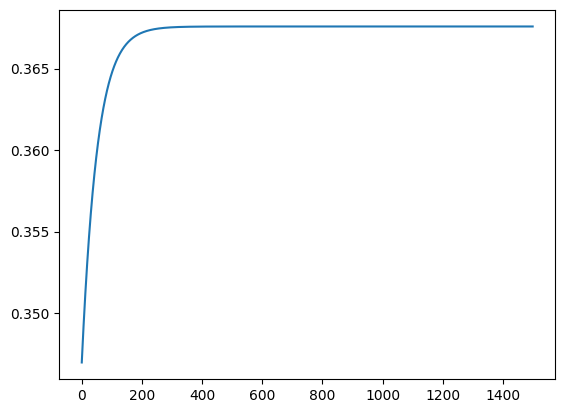

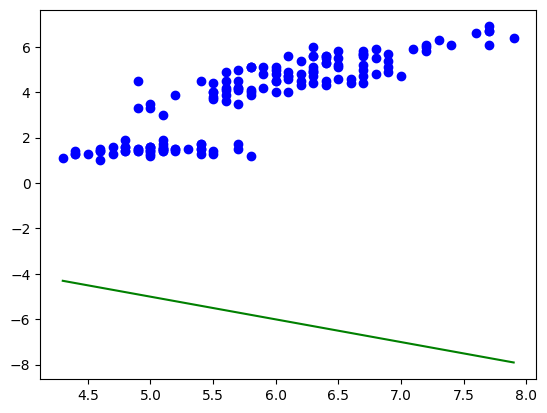

[]
[]


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

# pre load sklearn iris datasets
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
Y = iris.target

dataset = []

target_label = 0 # choose the target label of flower type
for index, x in enumerate(X):
    transform_label = None
    if Y[target_label]==target_label:
      transform_label=1

    else:
      transform_label=0
    x = [x[0], x[2]]
    dataset.append((x,transform_label))
print(x)
dataset = np.array(dataset)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sgd(dataset, w):
    #run sgd randomly
    grad=np.zeros(2)
    index = random.randint(0, len(dataset) - 1)
    x,y=dataset[index]
    for x ,y in dataset:
      y_pred=sigmoid (np.dot(x,w))
      grad += (y_pred - y) **2
      return grad/len(dataset)

def cost(dataset, w):
    total_cost = 0
    for x,y in dataset:
       y_pred = sigmoid(np.dot(x,w))
       total_cost += -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)
    return total_cost/(2*len(dataset))

def logistic_regression(dataset):
    w = np.zeros(2)
    limit = 1500 #update times
    eta = 0.1 #update rate
    costs = []
    for i in range(limit):
       dw=sgd(dataset,w)
       w-= eta * dw
       new_cost=cost(dataset,w)
       costs.append(new_cost)
       eta = eta * 0.98 #decrease update rate
    plt.plot(range(limit), costs)
    plt.show()
    return w,(limit, costs)

def main():
    #execute
    w = logistic_regression(dataset)
    #draw
    ps = [v[0] for v in dataset]
    label = [v[1] for v in dataset]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    #plot via label
    tpx=[]
    for index, label_value in enumerate(label):
        px=ps[index][0]
        py=ps[index][1]
        tpx.append(px)
        if label_value == 1:
            ax1.scatter(px, py, c='b', marker="o", label='O')
        else:
            ax1.scatter(px, py, c='r', marker="x", label='X')

    l = np.linspace(min(tpx),max(tpx))
    a,b = (-w[0][0]/w[0][1], w[0][0])
    ax1.plot(l, a*l + b, 'g-')
    #plt.legend(loc='upper left');
    plt.show()

    limit = w[1][0]
    costs = w[1][1]
    w = w[0]

    # calculate score
    predicted_Y=[]
    answer_Y=[]
    for X,Y in dataset:
        '...'
    predicted_Y = np.asarray(predicted_Y)
    predicted_Y = predicted_Y > 0.5
    print(answer_Y)
    print(predicted_Y)


if __name__ == '__main__':
    main()


# Question 3 :
## Implement linear regression using "mini-batch" gradient descent


Mini-Batch Gradient Descent: Parameters are updated after computing the gradient of  the error with respect to a subset of the training set.
Thus, mini-batch gradient descent makes a compromise between the speedy convergence and the noise associated with gradient update which makes it a more flexible and robust algorithm.


 Mini-Batch Gradient Descent: Algorithm-

    Let theta = model parameters and max_iters = number of epochs. for itr = 1, 2, 3, …, max_iters:       for mini_batch (X_mini, y_mini):

        Forward Pass on the batch X_mini:
            Make predictions on the mini-batch
            Compute error in predictions (J(theta)) with the current values of the parameters
        Backward Pass:
            Compute gradient(theta) = partial derivative of J(theta) w.r.t. theta
        Update parameters:
            theta = theta – learning_rate*gradient(theta)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 8000)

# visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker='.')
plt.show()

# train-test-split
data = np.hstack((np.ones((data.shape[0], 1)), data))

split_factor = 0.90
split = int(split_factor * data.shape[0])

X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split:, :-1]
y_test = data[split:, -1].reshape((-1, 1))



# linear regression using "mini-batch" gradient descent
# function to compute hypothesis / predictions


def hypothesis(X, theta):
	return '...'

# function to compute gradient of error function w.r.t. theta


def gradient(X, y, theta):
	'...'

# function to compute the error for current values of theta


def cost(X, y, theta):
	'...'

# function to create a list containing mini-batches


def create_mini_batches(X, y, batch_size):
	mini_batches = []
	data = np.hstack((X, y))
	np.random.shuffle(data)
	n_minibatches = data.shape[0] // batch_size
	i = 0

	for i in range(n_minibatches + 1):
		'...'
	if data.shape[0] % batch_size != 0:
		'...'
	return '...'

# function to perform mini-batch gradient descent


def gradientDescent(X, y, learning_rate=0.001, batch_size=32):
	'...'


theta, error_list = gradientDescent(X_train, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()


# predicting output for X_test
y_pred = hypothesis(X_test, theta)
plt.scatter(X_test[:, 1], y_test[:, ], marker='.')
plt.plot(X_test[:, 1], y_pred, color='orange')
plt.show()

# calculating error in predictions
error = '...'

